## ⚡️ Predicting the Residential Electricity Consumption using Machine Learning/Data Science 💡

In this notebook, we're going to go through a machine learning/data science project with the goal of creating a model that predicts electric consumption for housing units occupied as a primary residence and the households that live in them.

After, initial analysis of the dataset, our target variable is a number therefore, we are predicting a number. Also, we have labels associated with all of our data.
In other words, this is known as a supervised regression problem. 

The data we'll be is from [eia - U.S. Energy Information Administration](https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata)

The evaluation metrics that we will use are: 

* R-Squared (R²) 
* Adjusted R-Squared (Adj R²) 
* Mean Square Errors (MSE)
* Root Mean Squared Errors (RMSE)


These are the typical evaluation metrics that used to score a regression model.  

### What we'll end up with

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.
[6 Step Machine Learning Modelling Framework](https://whimsical.com/6-step-field-guide-to-machine-learning-projects-flowcharts-9g65jgoRYTxMXxDosndYTB)

We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which predicts the electricty consumption given different characteristics about it.

## 1. Problem Definition

For this dataset, the question we are trying to answer is,

> How well can we predict the electric consumption for housing units occupied as a primary residence and the households that live in them given over 12 000 rows of data?
There are over 900 variables (columns) to this dataset. There is potential possibility of making simplyfing assumptions in the interest of time or to neglect all variables that hold little weight to our target variable.

## 2. Data
Looking at the [eia dataset](https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata)
There are 3 datasets:
1. **Data File** a little over 12 000 rows.
2. **Layout File** helping understand the meaning of each variable
3. **Excel File** where all variables are defined and understanding their correlation with the dependent variable.
**Important to note:** There is a **4th file**, a microdata file, explaining explaining to the user how to compute estimates and standard errors (RSEs)

## 3. Evaluation
For this problem, we have chosen a few standard regression model metrics. As mentioned above, the metrics we have chosen are:
* R-Squared (R²) 
* Adjusted R-Squared (Adj R²) 
* Mean Square Errors (MSE)
* Root Mean Squared Errors (RMSE)

Success can be defined as 


[EIA](https://www.eia.gov/consumption/residential/methodology/2009/pdf/using-microdata-022613.pdf) has set the evaluation metric to RSE (relative squared error). The goal will be to get this value as low as possible.

A relative standard error (RSE) is
defined as the standard error (square root of the variance) of a survey estimate, divided by the
survey estimate, and multiplied by 100. In other words, the RSE is the standard error relative to
the survey estimate on a scale from zero to 100.





## 4. Features

For this dataset, EIA provides a data dictionanry which contains information about what each attribute of the dataset means. You can view [the file on this page below "layout file".](https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata)
* After further investigation in the excel spreadsheet, not all 900+ variables play a role in the consumption of energy (dependent variable). Therefore, we can remove many variables from our weighted equation.
Knowing all of this, we can get started. We will need to import all necessary tools.

First, we'll import the dataset and start exploring. Since we know the evaluation metrics we're implementing, our first goal will be building a baseline model and seeing how it stacks up against our metrics

### Importing the data and preparing it for modelling.

In [79]:
# Imports 
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline 

# Model we are using 
from sklearn.ensemble import ExtraTreesRegressor

# Model evaluators
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


### Let's import our data and start exploring it.

In [80]:
df = pd.read_csv("/Users/justinghavami/desktop/python/zesty_ai_interview/recs2009_public.csv",low_memory = False)
df.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


### Let's explore the dataset

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


In [82]:
df.shape

(12083, 940)

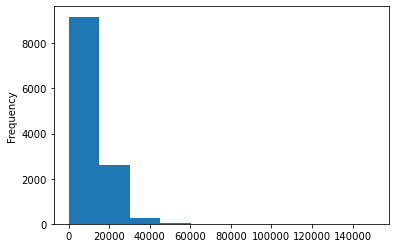

In [83]:
# Plotting our target variable to see what it looks like
df.KWH.plot.hist();

In [84]:
# mean of KWH
df.KWH.mean()

11288.15939750062

In [85]:
df.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [86]:
df.head().T

,0,1,2,3,4
DOEID,1,2,3,4,5
REGIONC,2,4,1,2,1
DIVISION,4,10,1,3,1
REPORTABLE_DOMAIN,12,26,1,7,1
TYPEHUQ,2,2,5,2,3
...,...,...,...,...,...
WSF,0.48,0.61,0.48,0.55,0.61
OA_LAT,6,0,3,4,4
GWT,56,64,52,55,50
DesignDBT99,9,38,12,7,13


In [87]:
df.describe()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,PERIODKR,SCALEKER,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,6042.000000,2.628321,5.373086,14.783663,2.659604,9402.981870,4141.375238,1415.406108,4135.146983,1443.503104,...,-1.935943,-1.955392,1681.961764,139.568485,3763.728544,0.499036,5.656046,59.128693,20.256311,90.359431
std,3488.205986,1.042142,2.859366,8.195824,1.192627,5192.101419,2317.759375,1134.659475,2260.543686,1021.748722,...,0.589907,0.415810,1401.079218,264.186908,2597.754419,0.083520,6.797205,8.678293,15.337626,6.166669
min,1.000000,1.000000,1.000000,1.000000,1.000000,476.100000,0.000000,0.000000,0.000000,0.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.310000,0.000000,36.000000,-23.000000,60.000000
25%,3021.500000,2.000000,3.000000,8.000000,2.000000,6297.040000,2197.500000,561.000000,2224.000000,712.000000,...,-2.000000,-2.000000,262.500000,4.000000,1246.500000,0.430000,1.000000,52.000000,9.000000,87.000000
50%,6042.000000,3.000000,5.000000,15.000000,2.000000,7970.630000,4483.000000,1045.000000,4502.000000,1179.000000,...,-2.000000,-2.000000,1684.000000,30.000000,3878.000000,0.500000,3.000000,58.000000,18.000000,90.000000
75%,9062.500000,3.000000,7.000000,21.000000,3.000000,11330.030000,5913.000000,1897.000000,5854.000000,1842.500000,...,-2.000000,-2.000000,2662.000000,117.000000,5834.000000,0.560000,7.000000,66.000000,33.000000,94.000000
max,12083.000000,4.000000,10.000000,27.000000,5.000000,95779.140000,12525.000000,5480.000000,13346.000000,5357.000000,...,5.000000,3.000000,7623.000000,1884.000000,11567.000000,0.800000,34.000000,89.000000,67.000000,118.000000


In [88]:
df.shape

(12083, 940)

## DataFrame Analysis

From the shape of the dataframe, we understand that are we dealing with many variables (940).

Prior to this notebook, I read the documentation and files necessary to understand which components are the most valuable.

After analyzing the excel spreadsheet given with this assignment, we were able to eliminate many variables that had no correlation with the prediction of energy.

**Below are all the columns that DO have an impact on the amount of electricity used.**

* The last column of our upcoming dataset is our target variable (KWH)

In [89]:
principal_columns_list = ['DIPSTICK', 'AQUARIUM','ELECDEV','ELECCHRG','EQUIPM','FUELHEAT','CARRYKER','EQMAMT','MOISTURE',
'USEMOISTURE','H2OTYPE1','PLAYSTA3','TVAUDIOSYS3','OTHERSTB3','TVONWD3','TVONWE3','NUMPC','PCTYPE1','TIMEON1',
'PCONOFF1','PCTYPE2','TIMEON2','PCONOFF2','PCTYPE3','TIMEON3','PCONOFF3','FAX','WELLPUMP','TYPEHUQ','HDD65',
'CDD65','AIA_Zone','TOTROOMS','STOVENFUEL','STOVEFUEL','OVENFUEL','OVENUSE','MICRO','NUMMEAL','COFFEE','NUMFRIG','SIZRFRI1',
'ICE','ESFRIG','SIZRFRI2','ESFRIG2','SIZRFRI3','ESFRIG3','NUMFREEZ','SIZFREEZ','FREEZER','SIZFREEZ2','FREEZER2',
'DISHWASH','DWASHUSE','CWASHER','WASHLOAD','RNSETEMP','DRYER','DRYRFUEL','TVCOLOR','TVSIZE1','CABLESAT1','COMBODVR1',
'DVR1','PLAYSTA1','TVAUDIOSYS1','OTHERSTB1','TVONWD1','TVONWE1','TVSIZE2','CABLESAT2','COMBODVR2','DVR2','PLAYSTA2',
'TVAUDIOSYS2','OTHERSTB2','TVONWD2','TVONWE2','TVSIZE3','CABLESAT3','COMBODVR3','DVR3','FUELH2O','WHEATSIZ',
'WHEATAGE','H2OTYPE2','FUELH2O2','WHEATSIZ2','AIRCOND','COOLTYPE','USECENAC','NUMBERAC','USEWWAC','NUMCFAN',
'NOTMOIST','USENOTMOIST','SWIMPOOL','FUELPOOL','FUELTUB','LGT12','LGT12EE','LGT4','LGT4EE','LGT1','LGT1EE',
'NOUTLGTNT','LGTOEE','NGASLIGHT','ELECAUX','NHSLDMEM','TOTSQFT_EN','TOTHSQFT','TOTUCSQFT','KWH']

* Now we will create another dataframe (pc_df for principal components dataframe) and only use the variables that are correlated to our target variable. 
* To do so we will loop through the principal_columns_list.

In [90]:
pc_df = pd.DataFrame()
for name in principal_columns_list:
    pc_df[name] = df[name]
pc_df

,DIPSTICK,AQUARIUM,ELECDEV,ELECCHRG,EQUIPM,FUELHEAT,CARRYKER,EQMAMT,MOISTURE,USEMOISTURE,...,LGT1EE,NOUTLGTNT,LGTOEE,NGASLIGHT,ELECAUX,NHSLDMEM,TOTSQFT_EN,TOTHSQFT,TOTUCSQFT,KWH
0,-2,0,1,2,3,5,0,-2,0,-2,...,2,0,-2,-2,0,4,4675,3958,1118,18466
1,-2,0,2,2,3,1,0,1,0,-2,...,-2,0,-2,-2,0,6,2736,2736,400,5148
2,-2,0,1,2,2,1,0,-2,0,-2,...,2,-2,-2,-2,0,1,528,528,264,2218
3,-2,0,1,2,3,1,0,-2,1,5,...,-2,0,-2,-2,0,1,1623,1623,400,10015
4,-2,0,1,2,3,1,0,-2,0,-2,...,2,0,-2,-2,0,1,1912,1274,1912,2869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,0,0,1,2,3,1,0,1,0,-2,...,4,0,-2,-2,0,1,2160,893,1667,7647
12079,-2,0,1,2,6,1,0,3,0,-2,...,0,-2,-2,-2,1,1,502,502,0,1813
12080,0,0,1,2,3,1,0,1,0,-2,...,-2,0,-2,-2,0,4,4181,4181,400,9834
12081,0,0,0,-2,3,1,0,-2,0,-2,...,0,0,-2,-2,0,1,1728,864,1210,4800


##### We will check for any missing values. From quick observation and prior analysis, we do believe the dataset is compete but better to check for thoroughness

In [91]:
pc_df.head()

,DIPSTICK,AQUARIUM,ELECDEV,ELECCHRG,EQUIPM,FUELHEAT,CARRYKER,EQMAMT,MOISTURE,USEMOISTURE,...,LGT1EE,NOUTLGTNT,LGTOEE,NGASLIGHT,ELECAUX,NHSLDMEM,TOTSQFT_EN,TOTHSQFT,TOTUCSQFT,KWH
0,-2,0,1,2,3,5,0,-2,0,-2,...,2,0,-2,-2,0,4,4675,3958,1118,18466
1,-2,0,2,2,3,1,0,1,0,-2,...,-2,0,-2,-2,0,6,2736,2736,400,5148
2,-2,0,1,2,2,1,0,-2,0,-2,...,2,-2,-2,-2,0,1,528,528,264,2218
3,-2,0,1,2,3,1,0,-2,1,5,...,-2,0,-2,-2,0,1,1623,1623,400,10015
4,-2,0,1,2,3,1,0,-2,0,-2,...,2,0,-2,-2,0,1,1912,1274,1912,2869


In [92]:
pc_df.KWH.mean()

11288.15939750062

In [93]:
pc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 115 entries, DIPSTICK to KWH
dtypes: int64(115)
memory usage: 10.6 MB


All Numerical Values ☺️

In [94]:
pc_df.describe()

,DIPSTICK,AQUARIUM,ELECDEV,ELECCHRG,EQUIPM,FUELHEAT,CARRYKER,EQMAMT,MOISTURE,USEMOISTURE,...,LGT1EE,NOUTLGTNT,LGTOEE,NGASLIGHT,ELECAUX,NHSLDMEM,TOTSQFT_EN,TOTHSQFT,TOTUCSQFT,KWH
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,-1.394107,0.038153,1.402384,1.721179,3.446164,2.611520,-0.067781,-0.724406,0.152528,-1.433502,...,0.815526,-0.151204,-1.357941,-1.527601,0.235372,2.665646,2021.674253,1675.956219,918.130597,11288.159398
std,0.936631,0.191573,0.754702,1.251176,2.325053,2.265422,0.386141,1.693202,0.359547,1.398184,...,2.359858,1.551328,1.486765,0.852931,0.424249,1.515664,1350.866572,1200.819335,1064.550849,7641.190845
min,-2.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,-2.000000,...,-9.000000,-2.000000,-9.000000,-2.000000,0.000000,1.000000,100.000000,0.000000,0.000000,17.000000
25%,-2.000000,0.000000,1.000000,2.000000,3.000000,1.000000,0.000000,-2.000000,0.000000,-2.000000,...,0.000000,-2.000000,-2.000000,-2.000000,0.000000,2.000000,1052.000000,888.000000,204.000000,5837.000000
50%,-2.000000,0.000000,1.000000,2.000000,3.000000,1.000000,0.000000,-2.000000,0.000000,-2.000000,...,0.000000,0.000000,-2.000000,-2.000000,0.000000,2.000000,1696.000000,1400.000000,533.000000,9623.000000
75%,0.000000,0.000000,2.000000,2.000000,3.000000,5.000000,0.000000,1.000000,0.000000,-2.000000,...,2.000000,0.000000,-2.000000,-2.000000,0.000000,4.000000,2606.000000,2160.000000,1358.500000,14765.000000
max,1.000000,1.000000,3.000000,3.000000,21.000000,21.000000,1.000000,3.000000,1.000000,5.000000,...,40.000000,15.000000,15.000000,2.000000,1.000000,14.000000,15472.000000,13776.000000,10783.000000,150254.000000


In [95]:
pc_df.isna().sum()

DIPSTICK      0
AQUARIUM      0
ELECDEV       0
ELECCHRG      0
EQUIPM        0
             ..
NHSLDMEM      0
TOTSQFT_EN    0
TOTHSQFT      0
TOTUCSQFT     0
KWH           0
Length: 115, dtype: int64

In [96]:
for label, content in pc_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

No Missing Values!🤠 

In [97]:
# Correlation Matrix 
corr_matrix = pc_df.corr()
corr_matrix["KWH"].sort_values(ascending = False)

KWH         1.000000
TOTROOMS    0.439167
TOTHSQFT    0.410385
NUMCFAN     0.383531
USECENAC    0.382444
              ...   
NUMBERAC   -0.124570
HDD65      -0.130570
USEWWAC    -0.131469
DIPSTICK   -0.187320
TYPEHUQ    -0.353123
Name: KWH, Length: 115, dtype: float64

## Enough of Data Exploration

Let's start creating our model to see what else we can figure out about our data.

### Splitting our data

In [98]:
# Everything except target variable 
X = pc_df.drop("KWH", axis = 1)

# Target Variable
y = pc_df.KWH.values

In [99]:
# Independent variables (no target column)
X.head()

,DIPSTICK,AQUARIUM,ELECDEV,ELECCHRG,EQUIPM,FUELHEAT,CARRYKER,EQMAMT,MOISTURE,USEMOISTURE,...,LGT1,LGT1EE,NOUTLGTNT,LGTOEE,NGASLIGHT,ELECAUX,NHSLDMEM,TOTSQFT_EN,TOTHSQFT,TOTUCSQFT
0,-2,0,1,2,3,5,0,-2,0,-2,...,2,2,0,-2,-2,0,4,4675,3958,1118
1,-2,0,2,2,3,1,0,1,0,-2,...,0,-2,0,-2,-2,0,6,2736,2736,400
2,-2,0,1,2,2,1,0,-2,0,-2,...,2,2,-2,-2,-2,0,1,528,528,264
3,-2,0,1,2,3,1,0,-2,1,5,...,0,-2,0,-2,-2,0,1,1623,1623,400
4,-2,0,1,2,3,1,0,-2,0,-2,...,2,2,0,-2,-2,0,1,1912,1274,1912


In [100]:
len(X)

12083

In [101]:
len(y)

12083

In [102]:
# Independent Variables 
X

,DIPSTICK,AQUARIUM,ELECDEV,ELECCHRG,EQUIPM,FUELHEAT,CARRYKER,EQMAMT,MOISTURE,USEMOISTURE,...,LGT1,LGT1EE,NOUTLGTNT,LGTOEE,NGASLIGHT,ELECAUX,NHSLDMEM,TOTSQFT_EN,TOTHSQFT,TOTUCSQFT
0,-2,0,1,2,3,5,0,-2,0,-2,...,2,2,0,-2,-2,0,4,4675,3958,1118
1,-2,0,2,2,3,1,0,1,0,-2,...,0,-2,0,-2,-2,0,6,2736,2736,400
2,-2,0,1,2,2,1,0,-2,0,-2,...,2,2,-2,-2,-2,0,1,528,528,264
3,-2,0,1,2,3,1,0,-2,1,5,...,0,-2,0,-2,-2,0,1,1623,1623,400
4,-2,0,1,2,3,1,0,-2,0,-2,...,2,2,0,-2,-2,0,1,1912,1274,1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,0,0,1,2,3,1,0,1,0,-2,...,4,4,0,-2,-2,0,1,2160,893,1667
12079,-2,0,1,2,6,1,0,3,0,-2,...,1,0,-2,-2,-2,1,1,502,502,0
12080,0,0,1,2,3,1,0,1,0,-2,...,0,-2,0,-2,-2,0,4,4181,4181,400
12081,0,0,0,-2,3,1,0,-2,0,-2,...,4,0,0,-2,-2,0,1,1728,864,1210


In [103]:
# Target variable
y

array([18466,  5148,  2218, ...,  9834,  4800,  1764])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=1)

In [105]:
# Veryfing amount of rows
len(X_train) + len(X_val) + len(X_test)

12083

In [106]:
# Veryfing amount of rows
len(y_train) + len(y_val) + len(y_test)

12083

In [107]:
len(X_train), len(X_val), len(X_test)

(7249, 2417, 2417)

In [108]:
len(y_train), len(y_val), len(y_test)

(7249, 2417, 2417)

## Evaluation Metrics

The evaluation metrics that we will use for this project:
* R-Squared (R²) 
* Adjusted R-Squared (Adj R²) 
* Mean Square Errors (MSE)
* Root Mean Squared Errors (RMSE)


These are the typical evaluation metrics that used to score a regression model.  

## Modelling with Trial and Error and Research

After a few hours of trial and error with many different types of regression models and some research, we have concluded that the model we will use is the Extra Trees Regression model.

The reason for this model is to reduce variance more strongly than the weaker randomization schemes used by other methods. This is done by the explicit randomization of the cut-point and attribute combined with ensemble averaging.


In [109]:
# Extra Trees Regression
ex_reg = ExtraTreesRegressor(n_estimators=100, random_state=1).fit(X_train, y_train)
ex_reg_score = ex_reg.score(X_val,y_val)
ex_reg_score

0.6227631140624595

In [110]:
ex_reg.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

## The next step to this assignment is to hyperparameter tune our model

In [111]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [None, 1000]}

rs_model = RandomizedSearchCV(ExtraTreesRegressor(),
                              param_distributions=rf_grid,
                              n_iter=400,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed: 24.8min finished


CPU times: user 23min 34s, sys: 13.6 s, total: 23min 47s
Wall time: 24min 55s


RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_iter=400,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [None, 1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [112]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_samples': None,
 'max_features': 'auto',
 'max_depth': None}

### Train a model with best hyperparameters

In [145]:
# Most ideal hyperparameters
ideal_model = ExtraTreesRegressor(n_estimators = 90, min_samples_split = 8,
                                 min_samples_leaf = 3, max_samples = None,
                                 max_features = "auto" , max_depth = None,
                                 random_state = 1)
ideal_model.fit(X_train, y_train)

ExtraTreesRegressor(min_samples_leaf=3, min_samples_split=8, n_estimators=90,
                    random_state=1)

## Hyperparameter Analysis

With these new hyperparameters as well as using all the samples, we can see an improvement to our models performance. 

**To Note:** Our improvement was minimal but it's still an improvement. I'm just happy there was some sort of improvement...Unfortunately, not extremely significant after spending many hours on this. 

In [150]:
ideal_model_score = ideal_model.score(X_val,y_val)
ideal_model_score

0.6264443031546045

## Evaluation Metrics

Here are some evaluation metrics that I used to evaluate our model and to explain our model's success or lack of success.

### R² Regression Score or Coefficient of determinant

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

In our case, approximately ~59% of the observed variation can be explained by the model's inputs.

In [115]:
# Find R Squared (R^2) Values
y_preds = ideal_model.predict(X_test)
print('The R^2 value for Extra Trees Regressor is :', round((r2_score(y_test,y_preds)), 3))

The R^2 value for Extra Trees Regressor is : 0.591


This means there is a weak-medium correlation between our independent variables and our dependent variable. 

### Adjusted R² 

Adjusted R-squared, a modified version of R-squared, adds precision and reliability by considering the impact of additional independent variables that tend to skew the results of R-squared measurements.

In [116]:
# Find adjusted R Squared (Adj R2) Values
print('The Adj R2 value for Extra Trees Regressor is  :', round((1 - (1-r2_score(y_test,y_preds))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))

The Adj R2 value for Extra Trees Regressor is  : 0.587


### The Mean Square Errors (MSE) is a measure of the closeness of a regression line to a set of points.

In [117]:
# Find Mean Squared Errors (MSE)
MSE_et  = mean_squared_error(y_test,y_preds)
round(MSE_et)

22734110

Our data does not fit our regression line well. It is no surprise when our R-Squared value is at 0.589.

There are many factors that bring out this outcome and we will explore these factors shortly. 

### RMSE

Lower values of RMSE mean that the regression line is close to the data points, indicating a better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [118]:
# Find Root Mean Squared Errors (RMSE)
MSE_et  = mean_squared_error(y_test,y_preds)
print('The RMSE value for Extra Trees Regressor is  :', round(np.sqrt(MSE_et)));

The RMSE value for Extra Trees Regressor is  : 4768


Again, we had a good idea that our regression line would not be too close to the data points from our previous results.

## Plotting 

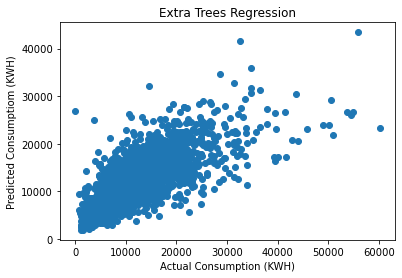

In [119]:
# Plot the actual vs predicted prices
plt.scatter(y_test, y_preds);
plt.xlabel("Actual Consumption (KWH)");
plt.ylabel("Predicted Consumptiom (KWH)");
plt.title("Extra Trees Regression");

### Feature Importance

We will explore which different attributes of the data were most most important when it comes to predicting the **target variable.**

In our case, after our model learned the patterns in the data, which attribute consumes the most amount of energy. What contributes the most to energy consumption?

Doing this for our `ExtraTreesRegressor` leads us to find the `feature_importances_` attribute.

In [120]:
ideal_model.feature_importances_

array([3.88116719e-03, 5.90392408e-04, 5.54785139e-03, 1.88265201e-03,
       5.50548935e-03, 6.63054972e-02, 2.15790175e-04, 4.37234396e-03,
       9.92753652e-04, 3.16658985e-04, 8.95202676e-05, 4.03515499e-03,
       5.00027788e-03, 4.62893846e-03, 3.87649281e-03, 4.55879426e-03,
       1.54337134e-03, 3.16653965e-03, 3.59698431e-03, 3.73812658e-03,
       4.06647771e-03, 5.43138567e-03, 5.10833966e-03, 1.89685500e-03,
       1.53470226e-03, 1.60990758e-03, 3.10614784e-03, 2.54092946e-02,
       7.87316208e-02, 4.82872819e-03, 8.82541298e-03, 1.06744015e-02,
       3.22097328e-02, 7.62932564e-03, 2.74956263e-03, 3.17193368e-03,
       4.01376287e-03, 8.16662704e-05, 2.89041474e-03, 3.82432729e-03,
       8.34694177e-03, 2.53872967e-03, 9.73866961e-03, 2.43093621e-03,
       1.39154152e-02, 9.25744737e-04, 2.72309706e-03, 3.85967229e-05,
       6.03554813e-03, 7.50607084e-03, 9.76497851e-03, 2.85391372e-04,
       4.89230586e-04, 2.79977934e-03, 1.01235946e-02, 1.85843101e-04,
      

In [121]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

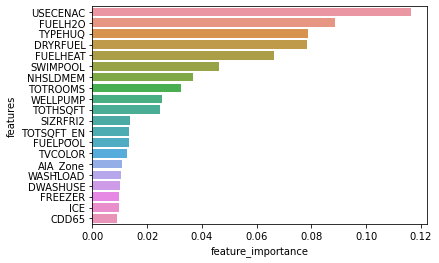

In [122]:
plot_features(X_train.columns, ideal_model.feature_importances_)

After plotting the feature importances, we can see there are about 10 attributes that play a role in our electric consumption.

We will only look at the first 10 attributes because after that, the weight of each attribute seems to even out.

1. USECENAC
- Frequency central air conditioner used in summer 2009. 
2. FUELH2O
- Fuel used by main water heater
3. DRYRFUEL
- Fuel used by clothes dryer
4. FUELHEAT
- Main space heating fuel 
5. TYPEHUQ
- Type of housing unit 
6. SWIMPOOL
- Swimming Pool
7. NHSLDMEM
- Number of household members
8. WELLPUMP
- Well water pump used
9. TOTROOMS
- Total number of tooms in the housing unit
10. TOTHSQFT
- Total heated square footage


Most of these correlations are evident but **below** will be a further analysis on these attributes.

**Important to Note:** In most of these graphs, there is a variable of **"-2"** which means **"Not Applicable"**. We are either lacking information about the subject or the data was not retrievable. 

In [123]:
sum(ideal_model.feature_importances_)

0.9999999999999999

## 1. USECENAC (Frequency central air conditioner used in summer 2009)

In [124]:
pc_df.USECENAC.value_counts()

-2    4647
 3    3838
 1    2104
 2    1494
Name: USECENAC, dtype: int64

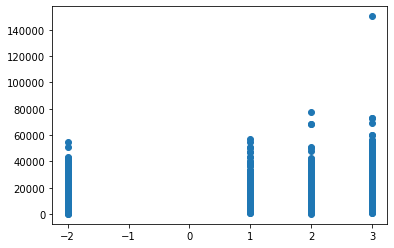

In [125]:
fig, ax = plt.subplots()
ax.scatter(df["USECENAC"][:10000], df["KWH"][:10000]);

The "USECENAC" variable is the frequency a household used their air conditioning used in summer 2009. "1" means it's turned on when nights needed, "2" means turned on quite a bit, **"3"** means turned on just about all summer. 

That is why the 3 column has higher consumption levels of electricty (Not always, but we can make some sort of general assumption because it makes logical sense)

## 2. FUELH2O (Fuel used by main water heater)

In [126]:
pc_df.FUELH2O.value_counts()

 1     6380
 5     4773
 3      457
 2      399
-2       34
 8       17
 7       11
 21       9
 4        3
Name: FUELH2O, dtype: int64

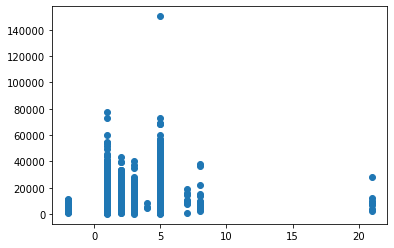

In [127]:
fig, ax = plt.subplots()
ax.scatter(df["FUELH2O"][:10000], df["KWH"][:10000]);

"FUELH2O" signifies the fuel used by the main water branch. **"5"** is the variable for electricity in this case. "1" is the variable for natural gas. 

## 3. DRYRFUEL (Fuel used by clothes dryer)

In [128]:
pc_df.DRYRFUEL.value_counts()

 5    7729
-2    2359
 1    1892
 2     103
Name: DRYRFUEL, dtype: int64

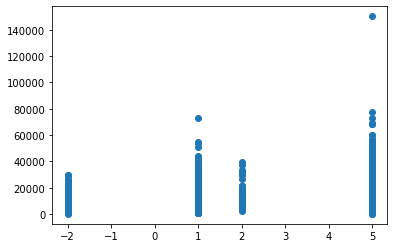

In [129]:
fig, ax = plt.subplots()
ax.scatter(df["DRYRFUEL"][:10000], df["KWH"][:10000]);

"DRYRFUEL" is the fuel used by clothes dryer where **"5"** signifies electricty and "1" signifies natural gas. 
If the fuel used by the clothes dryer is electricity, therefore, consumption of electricity is higher. 

## 4. FUELHEAT (Main space heating fuel)

In [130]:
pc_df.FUELHEAT.value_counts()

 1     5903
 5     4038
 3      817
 2      487
-2      446
 7      295
 4       52
 9       23
 21      21
 8        1
Name: FUELHEAT, dtype: int64

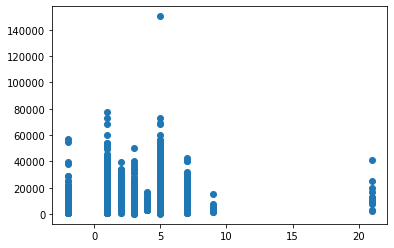

In [131]:
fig, ax = plt.subplots()
ax.scatter(df["FUELHEAT"][:10000], df["KWH"][:10000]);

The **"FUELHEAT"** attribute tells us what is the main space heating fuel. Variable "5" is what denotes electricity in this case. If the main space heating fuel is "5" (electricity), obviously there is a higher possibility that our target variable increases.

## 5. TYPEHUQ (Type of housing unit)

In [132]:
pc_df.TYPEHUQ.value_counts()

2    7803
5    1923
4     926
3     890
1     541
Name: TYPEHUQ, dtype: int64

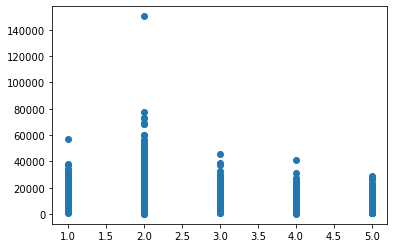

In [133]:
fig, ax = plt.subplots()
ax.scatter(df["TYPEHUQ"][:10000], df["KWH"][:10000]);

TYPEHUQ describes the type of housing unit. It would make sense for a larger housing unit to consume more energy. Consequently, there is a positive correlation between the type of housing unit and the energy consumed. Typically, larger type housing units will consume more electricity. Variable **"2""** seems to have the highest energy consumption. Variable **"2"** are the **"Single-Family Attached"** units.

## 6. SWIMPOOL (Swimming Pool)

In [134]:
pc_df.SWIMPOOL.value_counts()

 0    7796
-2    3390
 1     897
Name: SWIMPOOL, dtype: int64

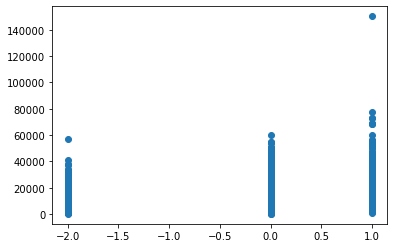

In [135]:
fig, ax = plt.subplots()
ax.scatter(df["SWIMPOOL"][:10000], df["KWH"][:10000]);

Does the household have a swimming pool? (0 = NO, 1 = YES, -2 = NOT APPLICABLE)
Typically, households that have a swimming pool will heat the swimming pool up over the course of when they are using it. That is why there is a higher consumption of electricity in households with a swimming pool.

## 7. NHSLDMEM (Number of household members)

In [136]:
pc_df.NHSLDMEM.value_counts()

2     4052
1     2785
3     2070
4     1749
5      859
6      343
7      128
8       52
9       26
10       8
11       5
14       4
12       2
Name: NHSLDMEM, dtype: int64

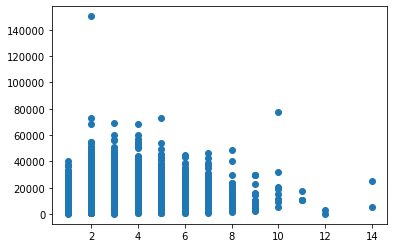

In [137]:
fig, ax = plt.subplots()
ax.scatter(df["NHSLDMEM"][:10000], df["KWH"][:10000]);

"NHSLDMEM" is used to describe the number of household members (0-15 Number of household members).

It is slightly confusing because the household with a total of 23 rooms only has 2 household members. 
Not sure why you would buy a house with 23 rooms for 2 people...

## 8. WELLPUMP (Well water pump used)

In [138]:
pc_df.WELLPUMP.value_counts()

 0    7839
-2    2849
 1    1395
Name: WELLPUMP, dtype: int64

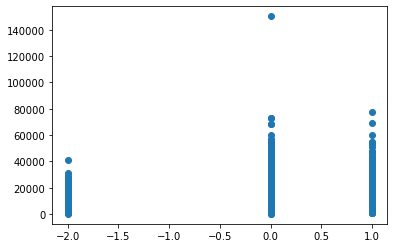

In [139]:
fig, ax = plt.subplots()
ax.scatter(df["WELLPUMP"][:10000], df["KWH"][:10000]);

This feature tells us if the household uses a wellpump or not. The variable "1" means the household does use a wellpump. A wellpump does consume a lot of energy when they are starting up. It is also possible to not use a wellpump but to use extreme amount of electricity. A household that has a high total of rooms without a wellpump will consume high amounts of energy no matter what the wellpump situation looks like.

## 9. TOTROOMS (Total number of tooms in the housing unit)

In [140]:
pc_df.TOTROOMS.value_counts()

6     2369
5     2199
7     1784
4     1766
8     1296
3      862
9      716
10     375
1      216
11     173
2      169
12      72
13      49
14      16
15       8
16       5
17       3
18       2
19       1
21       1
23       1
Name: TOTROOMS, dtype: int64

In [141]:
pc_df[pc_df["TOTROOMS"]==23]

,DIPSTICK,AQUARIUM,ELECDEV,ELECCHRG,EQUIPM,FUELHEAT,CARRYKER,EQMAMT,MOISTURE,USEMOISTURE,...,LGT1EE,NOUTLGTNT,LGTOEE,NGASLIGHT,ELECAUX,NHSLDMEM,TOTSQFT_EN,TOTHSQFT,TOTUCSQFT,KWH
3551,-2,0,1,2,2,5,0,1,0,-2,...,2,0,-2,-2,0,2,9545,9303,642,150254


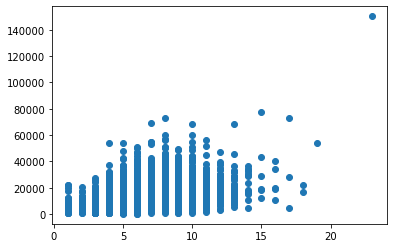

In [142]:
fig, ax = plt.subplots();
ax.scatter(pc_df["TOTROOMS"][:10000], pc_df["KWH"][:10000]);

TOTROOMS represents the total number of rooms in the housing unit. There more rooms there are to keep warm and lit up could affect the quantity of electricity used. Numbers 1-25 are the numbers used to simply describe the total number of rooms in the house.

## 10. TOTHSQFT (Total heated square footage)

In [143]:
pc_df.TOTHSQFT.value_counts()

0       446
1200     50
840      41
1800     39
1440     39
       ... 
1077      1
3124      1
5167      1
3059      1
4148      1
Name: TOTHSQFT, Length: 3467, dtype: int64

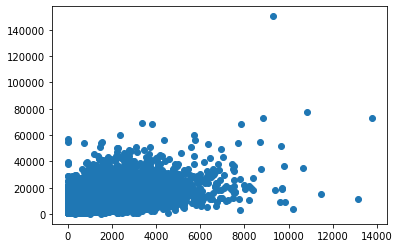

In [144]:
fig, ax = plt.subplots()
ax.scatter(df["TOTHSQFT"][:10000], df["KWH"][:10000]);

"TOTHSQFT" denotes the total heated square footage in square feet. 

# Report Analysis

This was a very insightful and interesting project. We were hoping for stronger correlations between the dependent variables and independent variable. Unfortunately, we found weak to medium correlations but we did have results that made sense.

Recap of what has been done:
1. Defined the Problem
2. Data Analysis 
3. Created a Model
4. Evaluated the Model 
5. Viewed its Most Important Features

### Problem Definition
The **goal** of this report is to help us understand in depth the results that we achieved. 
The problem we had was to be able to predict the electric consumption based on the dataset given. We more or less achieved our goal but it definitely was a good start to understanding electricity consumption in households.

### Data Analysis
We attacked our problem by exploring the data. This was an important process before creating our model. It allowed us to know what needed to get done before creating any sort of model (i.e. checking for missing values, knowing what kind of data types were we dealing with). When I had first starting working on the dataset with a draft notebook, I wanted to create a model using all of the 900+ variables in our dataset. I quickly came to understand that was just not going to work out. I read more documentation and did more research and realized many of our variables did not contribute to our electricity consumption. I, then, decided to remove all variables that had 0 correlation with our target variable. This was a very significant step in creating our model because it made things a lot clearer for our model.

### Model Choosing 
Moving forward, we knew we were dealing with a regression problem since we were predicting a number. We had many models to choose from. Since we were working with many variables, my goal was to reduce variance and to scale variables in the best possible way. There was much trial and error that went into this process.I scaled the attributes beforehand. None of these distance based models worked extremely well and I was not terribly surprised considering the variables we had. I then used models that scaled the data for me and compared these models with one another. My best resulting model was the ExtraTreesRegressor Model. It gave me the highest percentage of accuracy. My accuracy score ****(0.622)**** is not anything to brag about but we will discuss our final results soon. 

I was hoping that HyperParameter Tuning would increase my accuracy score but it had very little effect on it. It did improve slightly to a score of **(0.626)**

### Model Evaluation
We used a few evaluation metrics for our model to give us insights on why our model gave us these results. I was hopeful that we would have better results because I initially expected strong correlations between certain variables and our target variable. From our model evaluators, we can see the our Adjusted R-Squared Score **(0.587)** which tells us that our correlation between our inputs and target variable are weak to medium. 

### Feature Evaluation
This brings us to feature evaluation. This is always the most interesting part to me. We get to know more about our data and what exactly predicts the target variable. What has more power over the target variable? The ExtraTreesRegressor gives us an easy method (.feature_importances_). We then plotted our top 20 most important features. We see a noticeable drop off between our 1-10 features and 11-20 features. I decided to solely focus on our top 10 features to analyze them to see what they were. 

### What could we improve?
We could definitely clean up the data a bit more or be more precise in our approach. There were many variables in our dataset that had a "-2" which means "not applicable". Knowing the meaning of "not applicable" could change our approach to the problem. Does this mean that this data was simply not retrievable? If so, how do we retrieve this sort of data? This is important because this non-retrievable data affects our target variable and therefore, our model loses accuracy since it does not have that specific data. The model understands that our electricty variable might be increasing or decreasing without knowing the cause to that. 
More data of the missing data would help us tremendously in this process. 

Obviously, to improve model accuracy, we could remove outliers but I do believe outliers in this case are important. They are important because these outliers explain to us why our model accuracy is around **62-63%.**


For example, there we found positive correlations between the number of rooms in the house and the number of people living in that house. The issue comes when there are many rooms in the house for small amounts of people. We do have a tendecy to live in a society that overconsumates and that could skew our results. 

This is important to note because it gives us better reasons and more accurate reporting on how people live their lives. This is where we can help society to change for the better and to improve their day to day lives for themselves and the ones around them by making better decisions. 

